In [14]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from highlight_text import fig_text

pd.options.display.max_columns = 500

In [135]:
df = pd.read_csv("all_data.csv")

In [140]:
df.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', '90s', 'Touches',
       'Touches in Def Pen', 'Touches in Def 3rd', 'Touches in Mid 3rd',
       'Touches in Att 3rd', 'Touches in Att Pen', 'Take-Ons Att',
       'Take-Ons Succ', 'Tkld', 'Prg Carries', 'Carries into Final 3rd', 'CPA',
       'Prg Passes Recived', 'Passes Cmp', 'Passes Att', 'passes Cmp%',
       'Assists', 'xAG', 'xA', 'KP', 'Final 3rd', 'PPA', 'CrsPA', 'PrgP',
       'Shot Creating Actions', 'SCA90', 'Goal Creating Actions', 'GCA90',
       'Goals', 'Shots', 'SoT', 'xG', 'npxG'],
      dtype='object')

In [193]:
strikers = df[df["Pos"]=="FW"]
strikers = strikers[["Player","Pos","Touches in Att Pen", "Shot Creating Actions",
              "CPA", "PPA", "Prg Passes Recived","Goal Creating Actions", "Goals","npxG", "Shots", "Assists", "xA"]].reset_index()
strikers = strikers.drop('index', axis=1)


In [194]:
strikers

,Player,Pos,Touches in Att Pen,Shot Creating Actions,CPA,PPA,Prg Passes Recived,Goal Creating Actions,Goals,npxG,Shots,Assists,xA
0,Che Adams,FW,103,56,9,11,115,7,5,6.6,47,3,2.2
1,Miguel Almirón,FW,110,72,21,26,222,11,11,6.3,54,1,2.3
2,Michail Antonio,FW,78,38,17,8,114,9,5,6.4,37,3,0.8
3,Antony,FW,71,65,26,29,145,5,4,5.6,62,1,2.0
4,Pierre-Emerick Aubameyang,FW,23,8,4,2,29,0,1,1.5,16,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Callum Wilson,FW,101,32,12,6,103,8,15,12.7,59,4,1.8
85,Harry Wilson,FW,27,24,4,7,71,6,2,1.8,16,2,0.6
86,Yoane Wissa,FW,44,29,8,8,90,5,5,3.9,25,2,0.9
87,Chris Wood,FW,16,5,0,1,23,0,2,1.0,8,0,0.3


In [195]:
params = list(strikers.columns)
params = params[2:]

In [72]:
bgColor = "lightgrey"
playerColor = "#0052CC"

In [196]:
def playerChart(playerName, save=False):
    player = strikers.loc[strikers["Player"]== playerName].reset_index()
    player = list(player.loc[0])
    player = player[3:]
    
    values = []
    for x in range(len(params)):
        values.append(math.floor(stats.percentileofscore(strikers[params[x]],player[x])))

    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color=bgColor,     # background color
        straight_line_color="#222222",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        last_circle_color="#222222",    # color of last circle
        other_circle_ls="-.",           # linestyle for other circles
        other_circle_lw=1               # linewidth for other circles
)
    
    #slice colors
    slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                     # list of values
    
        figsize=(8, 8),             # adjust figsize according to your need
        kwargs_slices=dict(
            facecolor=playerColor, edgecolor="#222222",
            zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    
        kwargs_params=dict(
            color="#000000", fontsize=10.5,
             va="center"
    ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
             zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
        kwargs_compare_values=dict(
            color="#000000", fontsize=12,  zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

    # add title
    fig_text(
        0.515, 0.99, f"<{playerName}>", size=25, fig=fig,
        highlight_textprops=[{"color": playerColor}],
        ha="center", color="#000000"
)


    # add subtitle
    fig.text(
        0.515, 0.930,
        "Percentile Rank vs Premier Leauge Strikers | Season 2022-23",
        size=15,
        ha="center",  color="#000000"
)

    # add credits
    CREDIT_1 = "data: Opta via fbref"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
         color="#000000",
        ha="right"
)

    if save ==True:
        plt.savefig(f"viz/{playerName} Chart vs Premier League Strikers 2022-23", dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [171]:
strikers["Player"].unique()

array(['Che Adams', 'Miguel Almirón', 'Michail Antonio', 'Antony',
       'Pierre-Emerick Aubameyang', 'Taiwo Awoniyi', 'Patrick Bamford',
       'Armando Broja', 'Dominic Calvert-Lewin', 'Thomas Cannon',
       'Maxwel Cornet', 'Diego Costa', 'Matheus Cunha', 'Patson Daka',
       'Luis Díaz', 'Ben Doak', 'Odsonne Édouard', 'Anthony Elanga',
       'Evan Ferguson', 'Phil Foden', 'Datro Fofana', 'Tyrese Francois',
       'Ryan Fraser', 'Cody Gakpo', 'Joe Gelhardt', 'Anthony Gordon',
       'Jack Grealish', 'Darko Gyabi', 'Erling Haaland',
       'Omari Hutchinson', 'Danny Ings', 'Alexander Isak', 'Daniel James',
       'Gabriel Jesus', 'Raúl Jiménez', 'Diogo Jota', 'Sasa Kalajdzic',
       'Harry Kane', 'Neeskens Kebano', 'Noni Madueke', 'Anthony Martial',
       'Martinelli', 'Jean-Philippe Mateta', 'Neal Maupay',
       'Bryan Mbeumo', 'Alexander Mighten', 'Kaoru Mitoma',
       'Aleksandar Mitrovi?', 'Kieffer Moore', 'Andrew Moran',
       'Divin Mubama', 'Mykhailo Mudryk', 'Jacob M

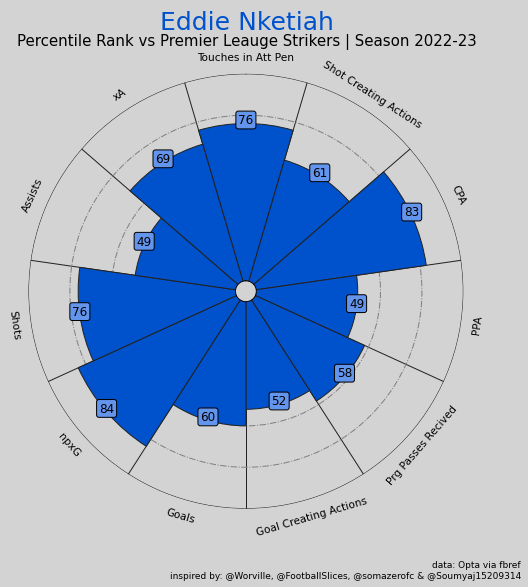

In [198]:
playerChart("Eddie Nketiah")